In [2]:
# Importing of libraries
import numpy as np
import csv
import matplotlib.pyplot as plt

In [3]:
# Function used toi import datasets. The function saves X and Y Columns as Numpy arrays and reshapes them in 2D form.

def getdata(filename):
    with open (filename,'r') as csvfile:
        Dataset_1_test = csv.reader(csvfile)
        X = []
        Y = []
        for row in Dataset_1_test:
            x = row[0]
            y = row[1]
            X.append(x)
            Y.append(y)

    X = np.array(X).astype(np.float32)
    Y = np.array(Y).astype(np.float32)
    # convert rank 1 array to rank 2 array
    X = np.reshape(X, (-1, 1))
    Y = np.reshape(Y, (-1, 1))
    return X , Y

In [4]:
#Importing all datasets using get data function and assigning X and Y respectively
X_test, Y_test = getdata("Dataset1/Dataset_1_test.csv")
X_train, Y_train = getdata("Dataset1/Dataset_1_train.csv")
X_valid, Y_valid = getdata("Dataset1/Dataset_1_valid.csv")

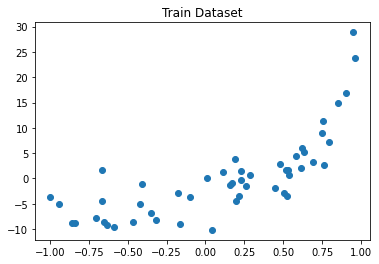

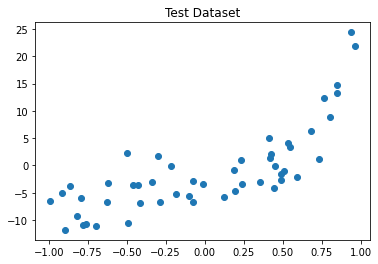

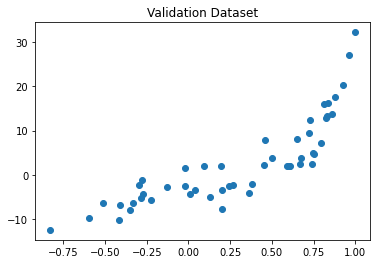

In [5]:
#Visualizing the data using matplot Scatter plots. We need to fit a curve to the initial training plot
plt.scatter(X_train,Y_train)
plt.title("Train Dataset")
plt.show()

plt.scatter(X_test,Y_test)
plt.title("Test Dataset")
plt.show()

plt.scatter(X_valid,Y_valid)
plt.title("Validation Dataset")
plt.show()

In [6]:
def getfeaturematrix (X,polynomial):
    Xm = []
    for i in range(0,polynomial+1):
        a = np.power(X,i)
        Xm.append(a)
    Xm = np.array(Xm)
    Xm = np.squeeze(Xm, axis=(2,)).T
    return Xm

In [7]:
Xm_train = getfeaturematrix (X_train,20)
feature_no = Xm_train.shape[1]


In [8]:
def computeMSE (Hypothesis,Y):
    #Y is the target value
    # Hypothesis is the suggested value we are fitting
    MSE = np.mean((Hypothesis-Y)**2)
    return MSE

In [9]:
# Calulating gradient of loss w.r.t parameters(weights and bias).
def gradients(X, y, y_hat):

    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis
    # w --> weights (parameter).
    # b --> bias (parameter).

    # m-> number of training examples.
    m = X.shape[0]

    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))

    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y))

    return dw, db

In [10]:
def x_transform(X, degrees):

    # X --> Input.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.

    # making a copy of X.
    t = X.copy()

    # Appending columns of higher degrees to X.
    for i in degrees:
        X = np.append(X, t**i, axis=1)

    return X

In [11]:
def train(X, y, bs, degrees, epochs, lr):

    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    # lr --> Learning rate.

    # Adding features to input X.
    x = x_transform(X, degrees)

    # m-> number of training examples
    # n-> number of features
    m, n = x.shape

    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0

    # Reshaping y.
    y = y.reshape(m,1)

    # Empty list to store losses.
    losses = []

    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):

            # Defining batches.
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]

            # Calculating hypothesis
            y_hat = np.dot(xb, w) + b

            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)

            # Updating the parameters.
            w -= lr*dw
            b -= lr*db

        # Calculating loss and appending it in the list.
        l = computeMSE(y, np.dot(x, w) + b)
        losses.append(l)

    # returning weights, bias and losses(List).
    return w, b, losses

In [12]:
# Predicting function.
def predict(X, w, b, degrees):

    # X --> Input.
    # w --> weights (parameter).
    # b --> bias (parameter).
    #degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.

    # Adding degrees to input X.
    x1 = x_transform(X, degrees)

    # Returning predictions.
    return np.dot(x1, w) + b

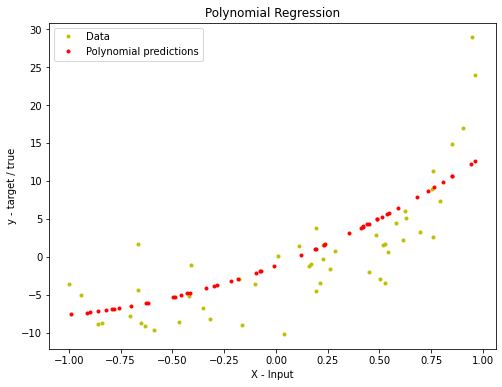

In [18]:
w, b, l = train(X_train, Y_train, bs=100, degrees=[20], epochs=1000,
                lr=0.01)
# Plotting
fig = plt.figure(figsize=(8,6))
plt.plot(X_train, Y_train, 'y.')
plt.plot(X_test, predict(X_test, w, b, [2]), 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()